### **UNIVERSIDAD GALILEO**
#### Instituto de Investigación de Operaciones
#### Posgrado en Análisis y Predicción de Datos
##### Luis Florian, 0710082

**Problema 1** \
Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color según el parámetro.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def changeImg(img, color):
    alto = img.shape[0]
    ancho = img.shape[1]    
    nombre_color = ""
    imgSalida = np.zeros((alto,ancho, 3)) #Lienzo, arreglo para RGB
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            # Extraccion de canales
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            if(color == 1):
                imgSalida[i,j] = [blue,0,0]
                nombre_color = "Blue"
            elif(color == 2):
                imgSalida[i,j] = [0,green,0]
                nombre_color = "Green"
            elif(color == 3):
                imgSalida[i,j] = [0,0,red]
                nombre_color = "Red"
            elif(color == 10):
                imgSalida[i,j] = [0,green,red]
                nombre_color = "Red_Verde"
            elif(color == 20):
                imgSalida[i,j] = [blue,green,0]
                nombre_color = "Green_Blue"
            elif(color == 30):
                imgSalida[i,j] = [blue,0,red]
                nombre_color = "Blue_Red"
                
    write_and_show(imgSalida,nombre_color) 

In [25]:
#Funcion para escribir a disco y mostrar imagen.
def write_and_show(imgSalida,color):
    cv2.imwrite("Problema1"+color+".jpg", imgSalida)
    imgTemp = cv2.imread("ImagenEn"+color+".jpg")
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

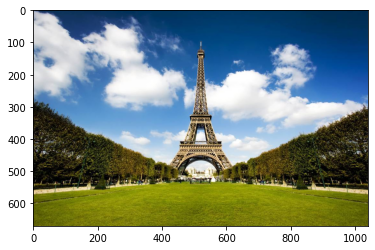

In [37]:
#Cargando y visualizando imagen a convertir
img = cv2.imread('torre.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


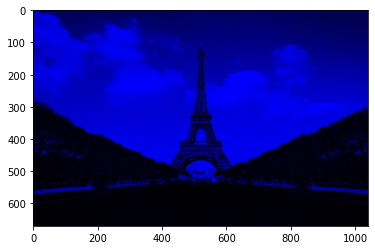

In [30]:
#Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
changeImg(img,1)

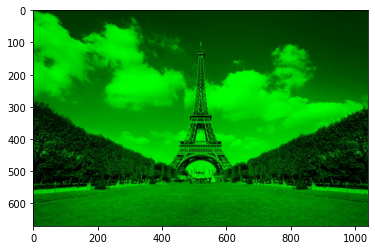

In [6]:
#Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
changeImg(img,2)

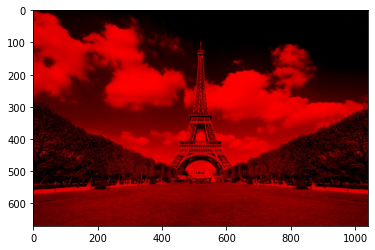

In [7]:
#Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
changeImg(img,3)

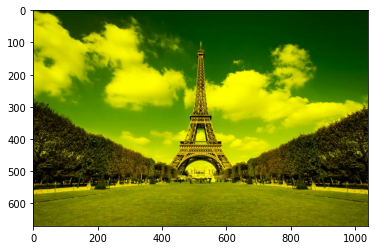

In [8]:
#Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
changeImg(img,10)

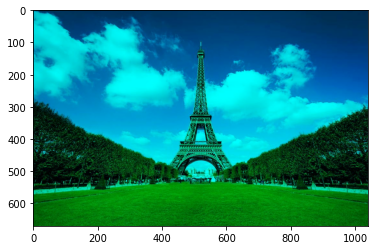

In [9]:
#Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
changeImg(img,20)

**Problema 3**\
Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las misma.

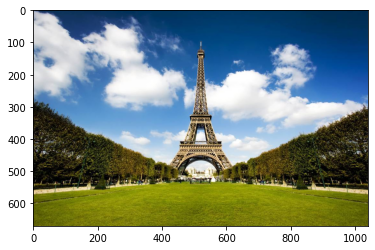

In [83]:
plt.imshow(img)
alto = img.shape[0]
ancho = img.shape[1]  
gray_green = np.zeros((alto,ancho,1))
gray_blue = np.zeros((alto,ancho,1))
gray_red = np.zeros((alto,ancho,1))
gray_aritmetica = np.zeros((alto,ancho,1))
gray_ponderado = np.zeros((alto,ancho,1))

In [84]:
for i in range(0,alto):
    for j in range(0,ancho):
        pixel = img[i,j]
        gray_blue[i,j] = pixel[2]
        gray_green[i,j] = pixel[1]
        gray_red[i,j] = pixel[0]
        
        gray_aritmetica[i,j] = np.mean(pixel)
        gray_ponderado[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])

In [85]:
def write_and_show(strImg, arrImg):
    cv2.imwrite(strImg, arrImg)
    imgTemp = cv2.imread(strImg)
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

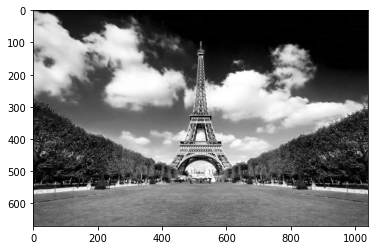

In [88]:
write_and_show("gray_rojo.jpg",gray_red)

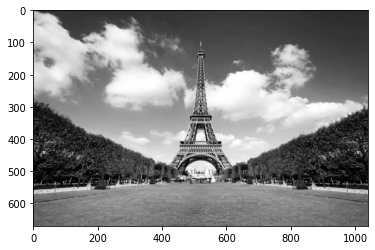

In [89]:
write_and_show("gray_verde.jpg",gray_green)

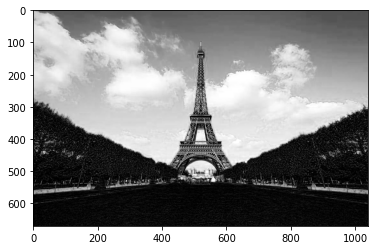

In [90]:
write_and_show("gray_azul.jpg",gray_blue)

**Problema 4**\
Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una lı́nea vertical la cual muestre el valor de la media
de la distribución.

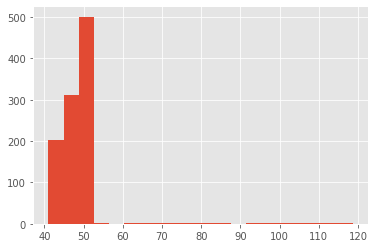

In [103]:
red1 = gray_aritmetica[0]
green1 = gray_aritmetica[1]
blue1 = gray_aritmetica[2]
plt.style.use('ggplot')
plt.hist(red1, bins=20)
plt.show()

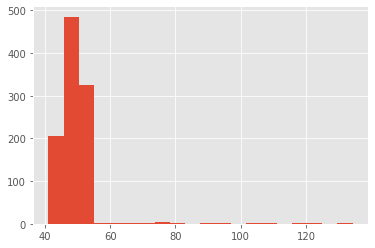

In [104]:
plt.hist(green1, bins=20)
plt.show()

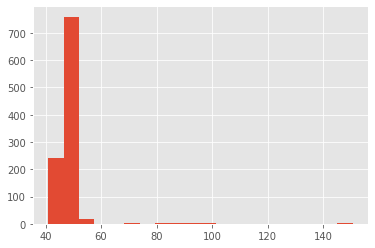

In [105]:
plt.hist(blue1, bins=20)
plt.show()

**Problema 5**\
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
función que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solución única).

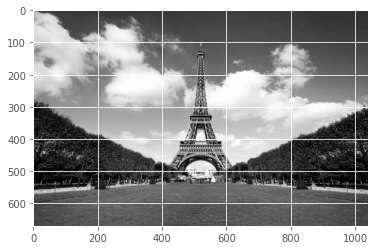

In [106]:
write_and_show("gray_ponderado.jpg",gray_ponderado)

**Problema 6**\
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio.

Es común que deseemos elegir un color adecuado para alguna de nuestras aplicaciones, cuando es así resulta muy útil usar la ruleta de color HSV. En ella el matiz se representa por una región circular; una región triangular separada, puede ser usada para representar la saturación y el valor del color. Normalmente, el eje horizontal del triángulo denota la saturación, mientras que el eje vertical corresponde al valor del color. De este modo, un color puede ser elegido al tomar primero el matiz de una región circular, y después seleccionar la saturación y el valor del color deseados de la región triangular. 